## Objective

The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

## Tasks

1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).
2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.
3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.
4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.
6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features


## Answer

In [42]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder

Data preparation

In [2]:
# Read the .xlsx file as a Pandas dataframe
file = pd.ExcelFile('heart_disease.xlsx')
abr = pd.read_excel(file, 'Description')          # Coloumn headers abbreviation sheet
df = pd.read_excel(file, 'Heart_disease')         # Main dataframe sheet

In [3]:
print(abr)

         age                                       Age in years
0     Gender                       Gender ; Male - 1, Female -0
1         cp                                    Chest pain type
2   trestbps                             Resting blood pressure
3       chol                                cholesterol measure
4        fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
5    restecg  ecg observation at resting condition,   -- Val...
6     thalch                        maximum heart rate achieved
7      exang                            exercise induced angina
8    oldpeak  ST depression induced by exercise relative to ...
9      slope          the slope of the peak exercise ST segment
10      thal                                               Thal
11       num  target [0=no heart disease; 1,2,3,4 = stages o...


In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


 EDA & feature engineering

In [5]:
df.describe()       # Statistical values 

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
# Check for null values
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalch      False
exang       False
oldpeak      True
slope       False
thal        False
num         False
dtype: bool

In [7]:
df.dropna(inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,False,0.0,flat,fixed defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4


In [8]:
# Check for duplicates
df.duplicated().any()

True

In [9]:
df.drop_duplicates(inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,False,0.0,flat,fixed defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,normal,4
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4


In [10]:
# Labelling data
df['cp'].unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

In [12]:
# Label encoding on Chest pain type data
lab_enc= LabelEncoder()
df['cp']= lab_enc.fit_transform(df[['cp']])
df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,3,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,1,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,0,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,3,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,0,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,0,110,0,True,normal,92,False,0.0,flat,fixed defect,4
902,62,Male,0,160,254,True,st-t abnormality,108,True,3.0,flat,normal,4
903,53,Male,0,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,0,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4


In [13]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [14]:
# Label encoding ecg observation
df['restecg']= lab_enc.fit_transform(df[['restecg']])
df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,3,145,233,True,0,150,False,2.3,downsloping,fixed defect,0
1,41,Male,1,135,203,False,1,132,False,0.0,flat,fixed defect,0
2,57,Male,0,140,192,False,1,148,False,0.4,flat,fixed defect,0
3,52,Male,3,118,186,False,0,190,False,0.0,flat,fixed defect,0
4,57,Male,0,110,201,False,1,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,0,110,0,True,1,92,False,0.0,flat,fixed defect,4
902,62,Male,0,160,254,True,2,108,True,3.0,flat,normal,4
903,53,Male,0,125,0,False,1,120,False,1.5,upsloping,reversable defect,4
904,62,Male,0,166,170,False,2,120,True,3.0,flat,reversable defect,4


In [15]:
# Label encoding for slope and thal
df['slope']= lab_enc.fit_transform(df[['slope']])
df['thal']= lab_enc.fit_transform(df[['thal']])
df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,3,145,233,True,0,150,False,2.3,0,0,0
1,41,Male,1,135,203,False,1,132,False,0.0,1,0,0
2,57,Male,0,140,192,False,1,148,False,0.4,1,0,0
3,52,Male,3,118,186,False,0,190,False,0.0,1,0,0
4,57,Male,0,110,201,False,1,126,True,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,0,110,0,True,1,92,False,0.0,1,0,4
902,62,Male,0,160,254,True,2,108,True,3.0,1,1,4
903,53,Male,0,125,0,False,1,120,False,1.5,2,2,4
904,62,Male,0,166,170,False,2,120,True,3.0,1,2,4


In [22]:
df['exang'].unique()

array([False, True, 'FALSE'], dtype=object)

In [25]:
df['sex']= lab_enc.fit_transform(df[['sex']])
df['fbs']= lab_enc.fit_transform(df[['fbs']])

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,False,2.3,0,0,0
1,41,1,1,135,203,0,1,132,False,0.0,1,0,0
2,57,1,0,140,192,0,1,148,False,0.4,1,0,0
3,52,1,3,118,186,0,0,190,False,0.0,1,0,0
4,57,1,0,110,201,0,1,126,True,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,1,0,110,0,1,1,92,False,0.0,1,0,4
902,62,1,0,160,254,1,2,108,True,3.0,1,1,4
903,53,1,0,125,0,0,1,120,False,1.5,2,2,4
904,62,1,0,166,170,0,2,120,True,3.0,1,2,4


In [28]:
# For exang values
mapping = {'False':False, 'True':True, 'FALSE':False}
df['exang'] = df['exang'].map(mapping).fillna(df['exang'])
df['exang'].unique()

array([False,  True])

In [29]:
df['exang']= lab_enc.fit_transform(df[['exang']])
df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,1,0,110,0,1,1,92,0,0.0,1,0,4
902,62,1,0,160,254,1,2,108,1,3.0,1,1,4
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4


In [30]:
# Setting features and target
target = df[['num']]
features = df.drop('num', axis=1)
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,1,0,110,0,1,1,92,0,0.0,1,0
902,62,1,0,160,254,1,2,108,1,3.0,1,1
903,53,1,0,125,0,0,1,120,0,1.5,2,2
904,62,1,0,166,170,0,2,120,1,3.0,1,2


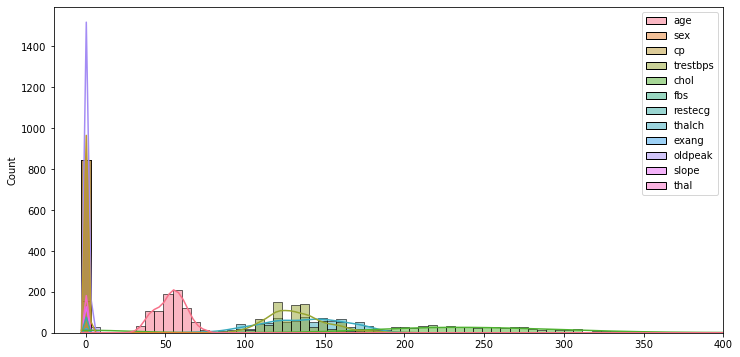

In [34]:
# Detection of outliers using visualization of distribution of features

plt.figure(figsize=(12,6))
sns.histplot(features, kde=True)
plt.xlim([-20, 400])
plt.show()

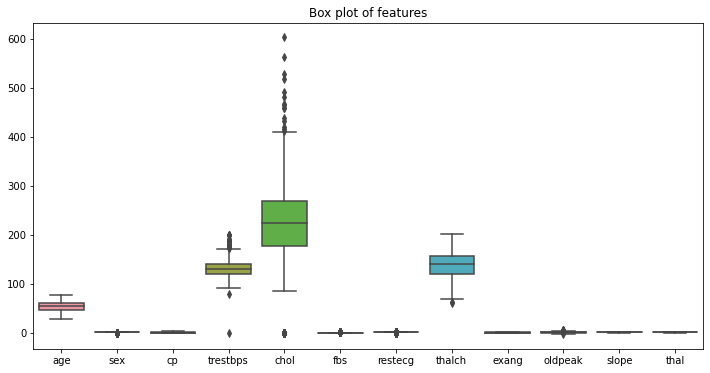

In [35]:
# box plot

plt.figure(figsize=(12,6))
sns.boxplot(data=features)
plt.title('Box plot of features')
plt.show()

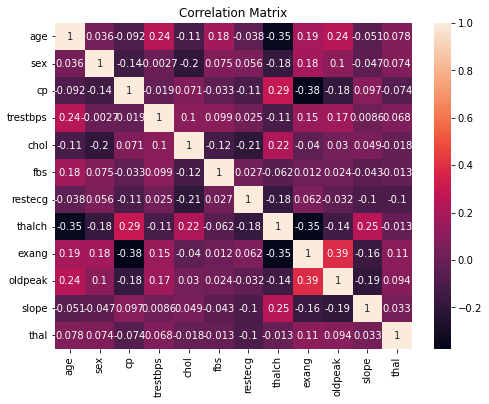

In [36]:
# Correlation matrices

corr = features.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [37]:
# Splitting into training and testing data
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

Decision Tree Classification

In [38]:
# Initiating decision tree model
dec_tree= DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)

In [39]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [40]:
y_pred=dec_tree.predict(x_test)

In [41]:
# Checking accuracy score
accuracy_score(y_test,y_pred)

0.5849056603773585

In [50]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        94
           1       0.51      0.52      0.52        75
           2       0.29      0.10      0.15        20
           3       0.38      0.26      0.31        19
           4       0.00      0.00      0.00         4

    accuracy                           0.58       212
   macro avg       0.37      0.34      0.34       212
weighted avg       0.54      0.58      0.55       212



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
# ROC AUC score

from sklearn.metrics import roc_auc_score

y_pred_proba = dec_tree.predict_proba(x_test)
y_pred_proba

array([[0.20833333, 0.20833333, 0.33333333, 0.25      , 0.        ],
       [0.08805031, 0.50943396, 0.18238994, 0.17610063, 0.04402516],
       [0.04878049, 0.2195122 , 0.26829268, 0.36585366, 0.09756098],
       ...,
       [0.9076087 , 0.07608696, 0.00543478, 0.00543478, 0.00543478],
       [0.4953271 , 0.26168224, 0.11214953, 0.07476636, 0.05607477],
       [0.20833333, 0.20833333, 0.33333333, 0.25      , 0.        ]])

In [56]:
roc_auc_score(y_test,y_pred_proba,multi_class="ovr")

0.7207030454524994

Visualizing decision tree structure

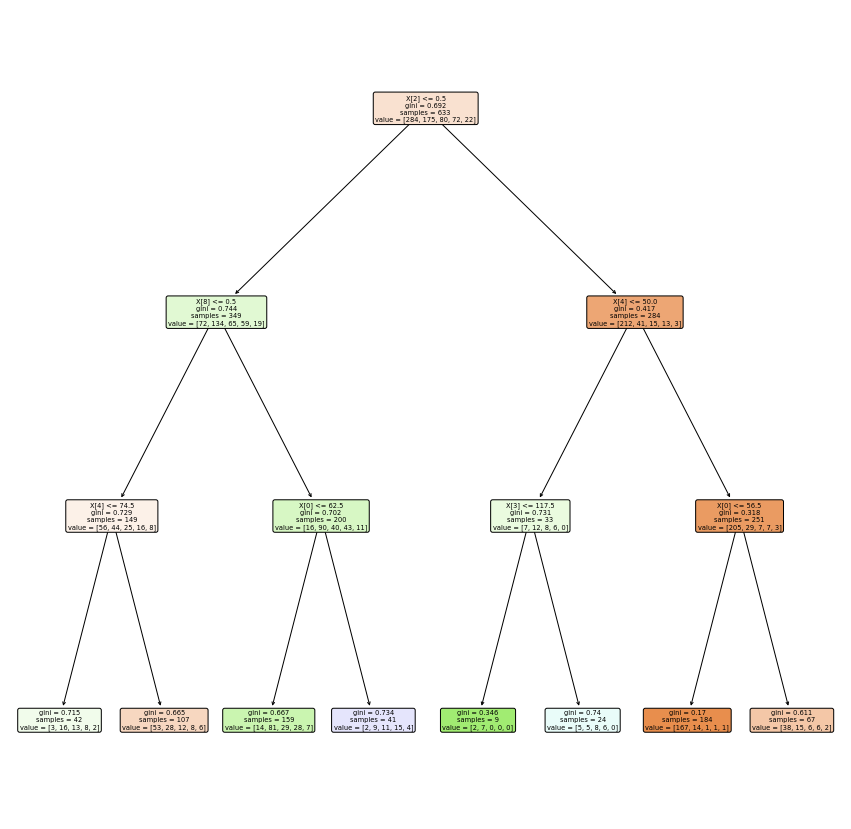

In [44]:
plt.figure(figsize=(15,15))
plot_tree(dec_tree,filled=True,rounded=True);

In [45]:
from sklearn import tree
print(tree.export_text(dec_tree))

|--- feature_2 <= 0.50
|   |--- feature_8 <= 0.50
|   |   |--- feature_4 <= 74.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  74.50
|   |   |   |--- class: 0
|   |--- feature_8 >  0.50
|   |   |--- feature_0 <= 62.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  62.50
|   |   |   |--- class: 3
|--- feature_2 >  0.50
|   |--- feature_4 <= 50.00
|   |   |--- feature_3 <= 117.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  117.50
|   |   |   |--- class: 2
|   |--- feature_4 >  50.00
|   |   |--- feature_0 <= 56.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  56.50
|   |   |   |--- class: 0



Hyperparameter tuning

In [46]:
# Hyperparameter tuning

params= {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5]}

grid_search= GridSearchCV(dec_tree,params,verbose=2)

In [47]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, 

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=2)

In [48]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}